# Models Forward Kinematics

## Imports

In [1]:
import os
from utils import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

2024-12-05 23:08:56.231111: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 23:08:56.250665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733436536.274492   72963 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733436536.281307   72963 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 23:08:56.306349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

2024-12-05 23:08:58.598955: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


5R Model found : NN1_5R_p80_e20.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN1_2R_p10_e20.keras
Number of 2R models : 1
Number of 3R models : 1
Number of 5R models : 1


Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.20562446117401123
End-effector predicted Y-position: 0.008269399404525757


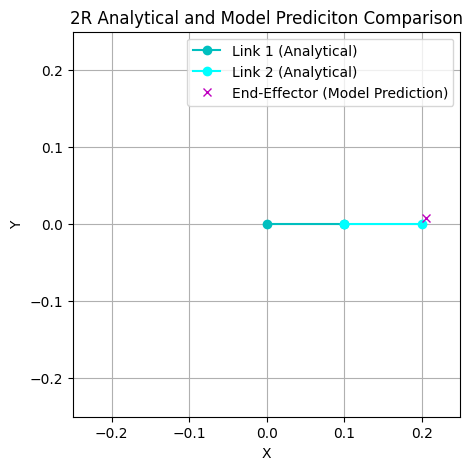

Distance error: 0.010000876462067243

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.10632449388504028
End-effector predicted Y-position: 0.0931529700756073


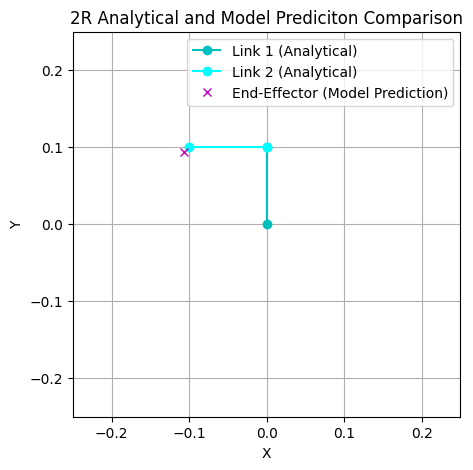

Distance error: 0.009321000036875937

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.06660302728414536
End-effector predicted Y-position: 0.16676755249500275


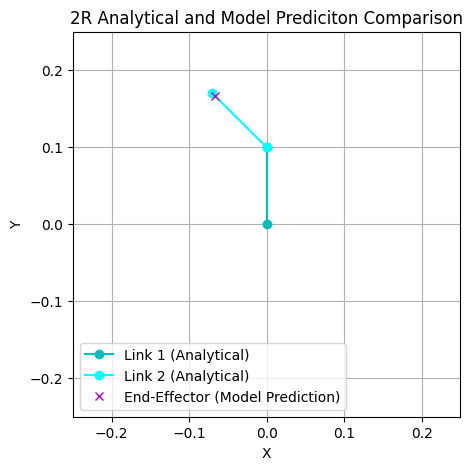

Distance error: 0.005693947230361974



In [3]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

In [4]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.18606296 -0.06227115]
 [ 0.00471841 -0.09382834]]
Jacobian Matrix analytical:
[[-0.18606296 -0.06227115]
 [ 0.00471841 -0.09382834]]


Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.3234669268131256
End-effector predicted Y-position: 0.019975334405899048


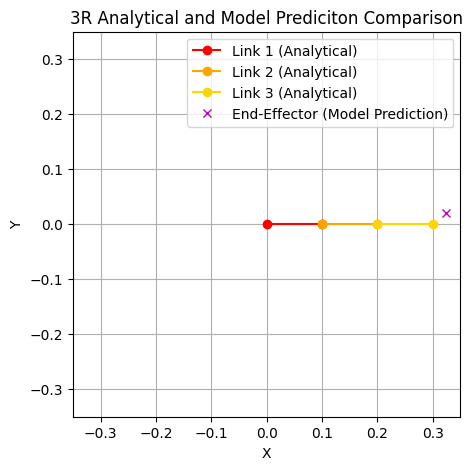

Distance error: 0.03081737559689478

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.03039480186998844
End-effector predicted Y-position: 0.24296444654464722


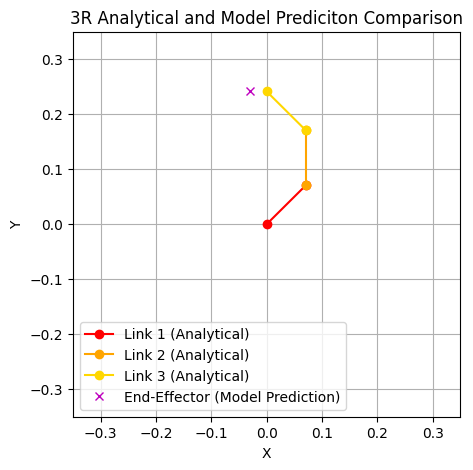

Distance error: 0.030433946645357274

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: 0.0034044310450553894
End-effector predicted Y-position: 0.09112071245908737


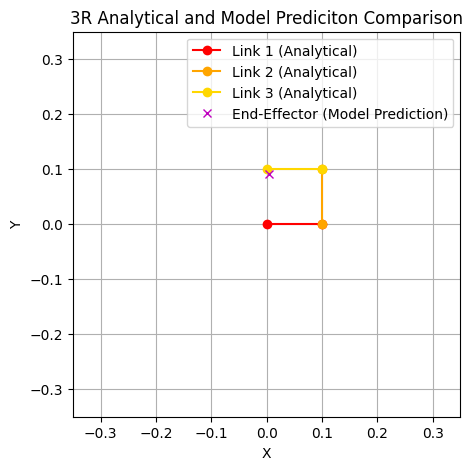

Distance error: 0.009509568758610639



In [5]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


In [6]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.13089    -0.2799463  -0.09163138]
 [ 0.01696378 -0.12449657 -0.0874847 ]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


In [7]:
model_5R = MODELS_5R[0].model
name_5R = MODELS_5R[0].get_name()

if 'raw' in name_5R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: -0.015200197696685791
End-effector predicted Y-position: -0.008173923939466476
End-effector predicted Z-position: 0.6026794910430908


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.07993068546056747
End-effector predicted Y-position: 0.30186086893081665
End-effector predicted Z-position: 0.14636021852493286




In [8]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.12601161 -0.04792041 -0.07718609 -0.04949395  0.07480657]
 [ 0.23656455 -0.13892786 -0.26766354 -0.23966846 -0.06250999]
 [ 0.03090156 -0.10721834 -0.15352736 -0.01397511  0.05242194]]
